In [ ]:
!pip install scipy

In [25]:
import cmdstanpy
import arviz as az
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **Excercise 1**
### Review of data wrangling and visualization in Python

Import Data1.csv file to python.

In [26]:
data = pd.read_csv("/content/drive/MyDrive/Data_Analytics/Data1.csv")

Set first column as the index.

In [ ]:
data.head(10)

,Unnamed: 0,theta_1,theta_2,theta_3,theta_4,theta_5,theta_6
0,2017-01-01,0.756936,-1.467790,0.096136,-0.115306,-0.447908,0.902579
1,2017-01-02,0.767089,0.185797,-1.428536,-0.086443,-0.954288,1.930909
2,2017-01-03,0.404544,1.415887,0.443466,0.000200,-0.892351,2.449691
3,2017-01-04,1.313957,-1.804471,-0.836986,0.011785,-1.012518,1.182085
4,2017-01-05,0.209862,1.315868,0.140993,-0.046473,-1.417092,1.742433
5,2017-01-06,-0.671767,-1.554742,2.933988,0.007891,-0.672258,0.562830
6,2017-01-07,-0.959496,3.023571,-0.856280,-0.001144,-1.229958,-0.187138
7,2017-01-08,-0.191306,-3.130415,-0.256385,0.078293,-0.725807,0.785517
8,2017-01-09,-0.377351,-2.506434,-0.291662,-0.032130,-0.768863,-1.657719
9,2017-01-10,1.091997,1.006235,3.540325,0.012692,-0.662433,0.088907


In [27]:
data.set_index("Unnamed: 0")

,theta_1,theta_2,theta_3,theta_4,theta_5,theta_6
Unnamed: 0,,,,,,
2017-01-01,0.756936,-1.467790,0.096136,-0.115306,-0.447908,0.902579
2017-01-02,0.767089,0.185797,-1.428536,-0.086443,-0.954288,1.930909
2017-01-03,0.404544,1.415887,0.443466,0.000200,-0.892351,2.449691
2017-01-04,1.313957,-1.804471,-0.836986,0.011785,-1.012518,1.182085
2017-01-05,0.209862,1.315868,0.140993,-0.046473,-1.417092,1.742433
...,...,...,...,...,...,...
2019-12-27,-1.520171,-1.128868,1.108275,0.936817,0.948045,11.755980
2019-12-28,0.338910,-3.178251,1.484579,1.051123,1.025288,11.397092
2019-12-29,0.263781,0.045725,-0.112476,0.823782,0.914111,10.918941


In [ ]:
data.rename(columns={"Unnamed: 0": "Date"})

,Date,theta_1,theta_2,theta_3,theta_4,theta_5,theta_6
0,2017-01-01,0.756936,-1.467790,0.096136,-0.115306,-0.447908,0.902579
1,2017-01-02,0.767089,0.185797,-1.428536,-0.086443,-0.954288,1.930909
2,2017-01-03,0.404544,1.415887,0.443466,0.000200,-0.892351,2.449691
3,2017-01-04,1.313957,-1.804471,-0.836986,0.011785,-1.012518,1.182085
4,2017-01-05,0.209862,1.315868,0.140993,-0.046473,-1.417092,1.742433
...,...,...,...,...,...,...,...
1090,2019-12-27,-1.520171,-1.128868,1.108275,0.936817,0.948045,11.755980
1091,2019-12-28,0.338910,-3.178251,1.484579,1.051123,1.025288,11.397092
1092,2019-12-29,0.263781,0.045725,-0.112476,0.823782,0.914111,10.918941
1093,2019-12-30,-0.425098,-1.002701,-0.834294,0.850904,0.801977,11.140722


Plot all columns as time series.

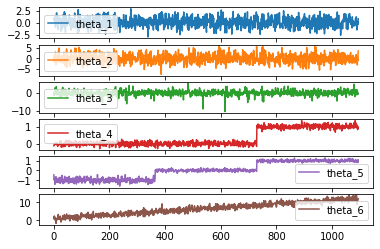

In [ ]:
data.plot(subplots=True)
plt.show()

Plot histograms of all columns, verify bin size. Plot all on a single, faceted plot.

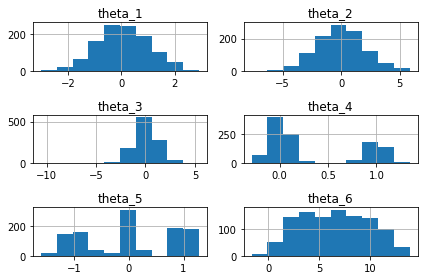

In [ ]:
data.hist()
plt.tight_layout()
plt.show()

Plot KDE-s (Kernel Denisty Estimators) for all columns.

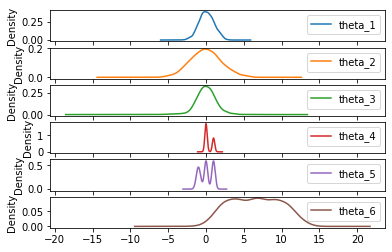

In [ ]:
data.plot.density(subplots=True)
plt.show()

Repeat analysis for columns $\theta_1$-$\theta_4$ in 2018.

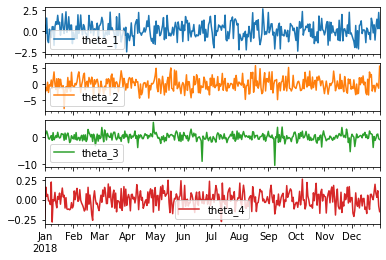

In [ ]:
data_2 = pd.read_csv("/content/drive/MyDrive/Data_Analytics/Data1.csv", index_col=0, parse_dates = True)
data_2018 = data_2.loc['2018', 'theta_1':'theta_4']
data_2018.plot(subplots=True)
plt.show()

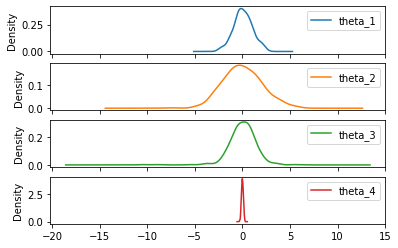

In [ ]:
data_2018.plot.density(subplots=True)
plt.show()

# **Excercise 2**
### Installation of cmdstanpy

In [28]:
 import cmdstanpy; cmdstanpy.install_cmdstan()
 from cmdstanpy import CmdStanModel

INFO:cmdstanpy:CmdStan version: 2.29.1
INFO:cmdstanpy:Install directory: /root/.cmdstanpy
INFO:cmdstanpy:CmdStan version 2.29.1 already installed


Create a dataset (as a dictionary) of F+L binary samples with F zeros and L ones, with F=number of letters in first name, L=number of letters in last name. Dictionary needs to consist of N=F+L, and y = list of samples.

In [59]:
# F = 3, L = 13
dataset = {
    "N": 16,
    "y": [1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1] }

In [60]:
model = CmdStanModel(stan_file="/content/drive/MyDrive/Data_Analytics/bern_1.stan")

INFO:cmdstanpy:compiling stan program, exe file: /content/drive/MyDrive/Data_Analytics/bern_1
INFO:cmdstanpy:compiler options: stanc_options=None, cpp_options=None
INFO:cmdstanpy:compiled model file: /content/drive/MyDrive/Data_Analytics/bern_1


In [61]:
model

CmdStanModel: name=bern_1
	 stan_file=/content/drive/MyDrive/Data_Analytics/bern_1.stan
	 exe_file=/content/drive/MyDrive/Data_Analytics/bern_1
	 compiler_optons=stanc_options=None, cpp_options=None

In [ ]:
fit = model.sample(data=dataset, output_dir = "/content/drive/MyDrive/Data_Analytics/outputs")

In [ ]:
#theta = model_fit.stan_variable('theta')
draws_theta = fit.stan_variable(var='theta')

In [ ]:
model_fit = fit.summary()
model_theta = model_fit.loc['theta']
theta_5 = model_theta['5%']
theta_95 = model_theta['95%']
median = model_theta['50%']
model_fit